# Assignment : 1

# Cancer Diagnosis Using Machine 

Learning Write and submit your python codes in “Jupyter Notebook” to perform the following tasks. Make sure to provide proper descriptions as MarkDown for each section of your code.  
 
In this homework, we work with a real dataset from UCI Datase

a- Read the dataset file “Cancer.csv” (you should download it from CSNS), and store it in a Pandas DataFrame. Check out the dataset. The dataset includes 9 numerical features. The last column is the binary label (“1” means it is a malignant cancer, “0” means it is a benign tumor). You will use all 9 features in this homework. 

In [126]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [127]:
df_cancer = pd.read_csv('C:\RiddhiDocuments\College\Python\CS-5661\Assignment\HW1\HW1\Cancer.csv')
df_cancer.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Malignant_Cancer
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [128]:
df_cancer.shape

(150, 10)

b- Use sklearn functions to split the dataset into testing and training sets with the following parameters: test_size=0.3, random_state=2.  
 

In [129]:
list(df_cancer)

['Clump_Thickness',
 'Uniformity_of_Cell_Size',
 'Uniformity_of_Cell_Shape',
 'Marginal_Adhesion',
 'Single_Epithelial_Cell_Size',
 'Bare_Nuclei',
 'Bland_Chromatin',
 'Normal_Nucleoli',
 'Mitoses',
 'Malignant_Cancer']

In [130]:
col = ['Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape','Marginal_Adhesion','Single_Epithelial_Cell_Size',
 'Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses']

X = df_cancer[col]

y = df_cancer['Malignant_Cancer']

print(X.head())

print(y.head())

   Clump_Thickness  Uniformity_of_Cell_Size  Uniformity_of_Cell_Shape  \
0                5                        1                         1   
1                5                        4                         4   
2                3                        1                         1   
3                6                        8                         8   
4                4                        1                         1   

   Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
0                  1                            2            1   
1                  5                            7           10   
2                  1                            2            2   
3                  1                            3            4   
4                  3                            2            1   

   Bland_Chromatin  Normal_Nucleoli  Mitoses  
0                3                1        1  
1                3                2        1  
2                3     

In [131]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)

In [132]:
print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)


X_train :  (105, 9)
X_test :  (45, 9)
y_train :  (105,)
y_test :  (45,)


c- Use “Decision Tree Classifier” to predict Cancer based on the training/testing datasets that you built in part (h). 

Then, calculate and report the accuracy and AUC of your classifier. 

Later in part (g), you will plot the ROC curve as well. Use this command to define your tree:  my_DecisionTree = DecisionTreeClassifier(random_state=2). 

In [133]:
from sklearn.tree import DecisionTreeClassifier

In [134]:
my_Decisiontree = DecisionTreeClassifier(random_state=2)

In [135]:
my_Decisiontree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2,
            splitter='best')

In [136]:
y_predict_dt= my_Decisiontree.predict(X_test)

print("Decision Trer Predict : \n",y_predict_dt)

Decision Trer Predict : 
 [0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0
 1 1 0 1 1 0 1 1]


In [137]:
accuracy_dt =accuracy_score(y_test,y_predict_dt)
print("DecisionTree :",accuracy_dt)

DecisionTree : 0.8666666666666667


In [138]:
#y_predict_DTC = accuracy_dt.predict(X_test)

d- Now, we want to perform “Bagging” based on 29 “base decision tree classifiers”.
Note: you should write your own code to perform Bagging (don’t use scikit-learn functions
for Bagging!)

To do so, you need to perform bootstrapping first. You can write a “for” loop with loop
variable i=0…18. In each iteration of the loop, you have to:

- make a bootstarp sample of the original “Training” Dataset (build in part(b)) with size
of bootstarp_size = 0.8*(Size of the original dataset). You can use the following
command to generate a random bootstrap dataset (“i" is the variable of the loop, so
the random_state changes in each iteration):
resample(X_train, n_samples = bootstarp_size , random_state=i , replace = True)

- Define and train a new base decision tree classifier on this dataset in each iteration:
Base_DecisionTree = DecisionTreeClassifier(random_state=2).

- Test “this base classifier” on the original “Testing” Dataset build in part(b), and save
the prediction results for all testing samples.
Then, Perform Voting to make the final decision on each data sample based on the votes
of all 29 classifiers. Finally, calculate and report the accuracy and AUC of your Bagging
method.

In [139]:
X_train_size=len(X_train)
print (X_train_size)


105


In [140]:
from sklearn.utils import resample

bootstrap_size = 84
predict_matrix = pd.DataFrame()

for i in range(19):
    X_train_bag = resample(X_train, n_samples = bootstrap_size, random_state=i, replace=True)
    y_train_bag = resample(y_train, n_samples = bootstrap_size, random_state=i, replace=True)
    Base_DT = DecisionTreeClassifier(random_state=2)
    Base_DT.fit(X_train_bag, y_train_bag)
    bag_predict = Base_DT.predict(X_test)
    series_predict = pd.Series(bag_predict)
    predict_matrix['Predict',i ] = series_predict.values
predict_matrix.head()

,"(Predict, 0)","(Predict, 1)","(Predict, 2)","(Predict, 3)","(Predict, 4)","(Predict, 5)","(Predict, 6)","(Predict, 7)","(Predict, 8)","(Predict, 9)","(Predict, 10)","(Predict, 11)","(Predict, 12)","(Predict, 13)","(Predict, 14)","(Predict, 15)","(Predict, 16)","(Predict, 17)","(Predict, 18)"
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,0,0,1,1,1,0,1,1,1,1,1,1,1,1,0
4,1,1,1,1,0,0,1,0,1,0,1,1,1,1,1,1,1,1,0


In [141]:
predict_matrix.shape

(45, 19)

In [142]:
predict_voting = predict_matrix.mode(axis=1)
predict_voting.head()

,0
0,0
1,1
2,1
3,1
4,1


In [143]:
score_bagging = accuracy_score(y_test,predict_voting)
print('Bagging Accuracy : ',score_bagging)

Bagging Accuracy :  0.9111111111111111


e- Use scikit-learn “Adaboost” classifier to predict Cancer based on the training/testing
datasets that you built in part (b). Then, calculate and report the accuracy and AUC of
your classifier. 

Use this command to import and define your classifier:
from sklearn.ensemble import AdaBoostClassifier
my_AdaBoost = AdaBoostClassifier(n_estimators = 29,random_state=2)

In [144]:
from sklearn.ensemble import AdaBoostClassifier

In [145]:
my_AdaBoost = AdaBoostClassifier(n_estimators = 29,random_state=2)
my_AdaBoost.fit(X_train,y_train)
predict_my_AdaBoost= my_AdaBoost.predict(X_test)

In [146]:
print("Predict My_AdaBoost : \n",predict_my_AdaBoost)

Predict My_AdaBoost : 
 [0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 1
 1 1 0 1 1 0 1 1]


In [147]:
myAdaBoost_accuracy =accuracy_score(y_test,predict_my_AdaBoost)
print("AdaBoost Accuracy :",myAdaBoost_accuracy)

AdaBoost Accuracy : 0.9555555555555556


f- In this section, we use an extremely popular Boosting algorithm called “XGBoost”. 

This
algorithm is not included in sklearn, so you need to install the XGBoost library. 

Please see
this for more infor: https://xgboost.readthedocs.io/en/latest/build.html
Mac users can easily install it with “pip install xgboost”.

Repeat part (e) with XGBoost. Use this command to import and define your classifier:

from xgboost import XGBClassifier
my_XGBoost = XGBClassifier(n_estimators = 29,random_state=2)

In [148]:
import xgboost as xgb
from xgboost import XGBClassifier

In [149]:
my_XGBoost = XGBClassifier(n_estimators = 29,random_state=2)
my_XGBoost.fit(X_train,y_train)
predict_my_XGBoost = my_XGBoost.predict(X_test)

In [150]:
print("Predict My_XGBoost : \n",predict_my_XGBoost)

Predict My_XGBoost : 
 [0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 1
 1 1 0 1 1 0 1 1]


In [151]:
myXGBoost_accuracy = accuracy_score(y_test,predict_my_XGBoost)
print("XGBoost Accuracy : ",myXGBoost_accuracy )

XGBoost Accuracy :  0.9555555555555556


g- Use scikit-learn “Random Forest” classifier to predict Cancer based on the training/testing
datasets that you built in part (b). 

Then, calculate and report the accuracy and AUC of
your classifier. Use this command to import and define your classifier:

from sklearn.ensemble import RandomForestClassifier
my_RandomForest =
RandomForestClassifier(n_estimators = 29, bootstrap = True, random_state=2)

In [152]:
from sklearn.ensemble import RandomForestClassifier

In [153]:
my_RandomForest = RandomForestClassifier(n_estimators = 29, bootstrap = True, random_state=2)
my_RandomForest.fit(X_train,y_train)
predict_my_RandomForest= my_RandomForest.predict(X_test)

In [154]:
print("Predict My_RandomForest : \n",predict_my_RandomForest)

Predict My_RandomForest : 
 [0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 1
 1 1 0 1 1 0 1 1]


In [155]:
my_RandomForest_accuracy =accuracy_score(y_test,predict_my_RandomForest)
print("Random Forest Accuracy:",my_RandomForest_accuracy)


Random Forest Accuracy: 0.9555555555555556


h- Now, plot the ROC curves of your algorithms in parts (c), (d), (e), (f), (g) in a single plane
with different colors along with the name of each method. Show the AUCs on the graph
as well.

- Which algorithm is the best w.r.t the AUC value?
- Which algorithm is the best w.r.t the Accuracy value?
- Which algorithm is the best when we want a False Positive Rate of %7?

In [156]:
# (c)
y_predict_dt= my_Decisiontree.predict(X_test)
print("Decision Tree Predict : \n",y_predict_dt)

Decision Tree Predict : 
 [0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0
 1 1 0 1 1 0 1 1]


In [157]:
# (D) 
bag_predict = Base_DT.predict(X_test)
print("Bagging Predict : \n",bag_predict)

Bagging Predict : 
 [0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0
 1 1 0 1 1 0 1 1]


In [158]:
# (E)

predict_my_AdaBoost= my_AdaBoost.predict(X_test)
print("AdaBoost Predict : \n",predict_my_AdaBoost)

AdaBoost Predict : 
 [0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 1
 1 1 0 1 1 0 1 1]


In [159]:
# (f)
predict_my_XGBoost = my_XGBoost.predict(X_test)
print("XGBoost Predict : \n",predict_my_XGBoost)

XGBoost Predict : 
 [0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 1
 1 1 0 1 1 0 1 1]


In [160]:
# (G)
predict_my_RandomForest= my_RandomForest.predict(X_test)
print("Predict My_RandomForest : ",predict_my_RandomForest)

Predict My_RandomForest :  [0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 1
 1 1 0 1 1 0 1 1]


In [161]:
predict_proba_dt = my_Decisiontree.predict_proba(X_test)
print("Decision Tree Prediction Probability : ",predict_proba_dt)

Decision Tree Prediction Probability :  [[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [162]:
predict_proba_bagging = Base_DT.predict_proba(X_test)
print("Bagging Prediction Probability : ",predict_proba_bagging)

Bagging Prediction Probability :  [[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [163]:
predict_proba_AdaBoost = my_AdaBoost.predict_proba(X_test)
print("AdaBoost Prediction Probability : ",predict_proba_AdaBoost)

AdaBoost Prediction Probability :  [[0.7635804  0.2364196 ]
 [0.0402279  0.9597721 ]
 [0.0267179  0.9732821 ]
 [0.14848565 0.85151435]
 [0.0862194  0.9137806 ]
 [0.0267179  0.9732821 ]
 [0.05309098 0.94690902]
 [0.18224427 0.81775573]
 [0.85183    0.14817   ]
 [0.63459123 0.36540877]
 [0.11292848 0.88707152]
 [0.02333145 0.97666855]
 [0.03047266 0.96952734]
 [0.0267179  0.9732821 ]
 [0.43298912 0.56701088]
 [0.20090783 0.79909217]
 [0.80678154 0.19321846]
 [0.55727195 0.44272805]
 [0.86676559 0.13323441]
 [0.12841716 0.87158284]
 [0.85183    0.14817   ]
 [0.86676559 0.13323441]
 [0.86676559 0.13323441]
 [0.7635804  0.2364196 ]
 [0.03012802 0.96987198]
 [0.0402279  0.9597721 ]
 [0.80678154 0.19321846]
 [0.86676559 0.13323441]
 [0.86676559 0.13323441]
 [0.33649008 0.66350992]
 [0.86676559 0.13323441]
 [0.02333145 0.97666855]
 [0.03012802 0.96987198]
 [0.86676559 0.13323441]
 [0.05239671 0.94760329]
 [0.39183394 0.60816606]
 [0.03012802 0.96987198]
 [0.14308017 0.85691983]
 [0.09048137 0.

In [164]:
predict_proba_XGBoost = my_XGBoost.predict_proba(X_test)
print("XGBoost Prediction Probability : ",predict_proba_XGBoost)

XGBoost Prediction Probability :  [[0.9321619  0.06783809]
 [0.05739409 0.9426059 ]
 [0.05596173 0.9440383 ]
 [0.12769341 0.8723066 ]
 [0.13352221 0.8664778 ]
 [0.04259121 0.9574088 ]
 [0.07937235 0.92062765]
 [0.09762859 0.9023714 ]
 [0.95094395 0.04905603]
 [0.6099427  0.39005733]
 [0.06982094 0.93017906]
 [0.05596173 0.9440383 ]
 [0.05739409 0.9426059 ]
 [0.04259121 0.9574088 ]
 [0.41394717 0.58605283]
 [0.2626993  0.7373007 ]
 [0.9519698  0.04803019]
 [0.52636755 0.47363243]
 [0.9579867  0.04201331]
 [0.09224886 0.90775114]
 [0.95094395 0.04905603]
 [0.9579867  0.04201331]
 [0.9579867  0.04201331]
 [0.75428027 0.24571973]
 [0.07887977 0.9211202 ]
 [0.05739409 0.9426059 ]
 [0.9519698  0.04803019]
 [0.9579867  0.04201331]
 [0.9579867  0.04201331]
 [0.40746325 0.59253675]
 [0.9579867  0.04201331]
 [0.04259121 0.9574088 ]
 [0.04259121 0.9574088 ]
 [0.9579867  0.04201331]
 [0.07937235 0.92062765]
 [0.3994943  0.6005057 ]
 [0.07887977 0.9211202 ]
 [0.25754333 0.7424567 ]
 [0.06810093 0.9

In [165]:
predict_proba_RandomForest = my_RandomForest.predict_proba(X_test)
print("Predict Probabibility My_RandomForest : \n",predict_proba_RandomForest)

Predict Probabibility My_RandomForest : 
 [[0.86206897 0.13793103]
 [0.         1.        ]
 [0.03448276 0.96551724]
 [0.20689655 0.79310345]
 [0.17241379 0.82758621]
 [0.         1.        ]
 [0.03448276 0.96551724]
 [0.         1.        ]
 [1.         0.        ]
 [0.31034483 0.68965517]
 [0.03448276 0.96551724]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.27586207 0.72413793]
 [0.13793103 0.86206897]
 [1.         0.        ]
 [0.34482759 0.65517241]
 [1.         0.        ]
 [0.13793103 0.86206897]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.62068966 0.37931034]
 [0.27586207 0.72413793]
 [0.03448276 0.96551724]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.31034483 0.68965517]
 [1.         0.        ]
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.20689655 0.79310345]
 [0.27586207 0.72413793]
 [0.20689655 0.79310345]
 [0.0344

In [166]:
fprdt,tprdt,thresholds = metrics.roc_curve(y_test, predict_proba_dt[:,1], pos_label=1)
print("Fpr Decision Tree : \n",fprdt)
print("tpr Decision Tree: \n",tprdt)


fprbag,tprbag,thresholds = metrics.roc_curve(y_test, predict_proba_bagging[:,1], pos_label=1)
print("Fpr Bagging : \n",fprbag)
print("tpr Bagging : \n",tprbag)


fprada,tprada,thresholds = metrics.roc_curve(y_test, predict_proba_AdaBoost[:,1], pos_label=1)
print("Fpr AdaBoost : \n",fprada)
print("tpr AdaBoost : \n",tprada)

fprxg,tprxg,thresholds = metrics.roc_curve(y_test, predict_proba_XGBoost[:,1], pos_label=1)
print("Fpr XGBoost : \n",fprxg)
print("tpr XGBoost : \n",tprxg)

fprrf,tprrf,thresholds = metrics.roc_curve(y_test, predict_proba_RandomForest[:,1], pos_label=1)
print("Fpr : \n",fprrf)
print("tpr : \n",tprrf)


Fpr Decision Tree : 
 [0.         0.11764706 1.        ]
tpr Decision Tree: 
 [0.         0.85714286 1.        ]
Fpr Bagging : 
 [0.         0.11764706 1.        ]
tpr Bagging : 
 [0.         0.82142857 1.        ]
Fpr AdaBoost : 
 [0.         0.         0.         0.         0.         0.
 0.         0.05882353 0.05882353 0.11764706 0.11764706 0.35294118
 0.52941176 1.        ]
tpr AdaBoost : 
 [0.         0.03571429 0.10714286 0.21428571 0.25       0.35714286
 0.42857143 0.46428571 0.96428571 0.96428571 1.         1.
 1.         1.        ]
Fpr XGBoost : 
 [0.         0.         0.         0.         0.05882353 0.05882353
 0.05882353 0.05882353 0.11764706 0.11764706 0.23529412 0.41176471
 0.52941176 1.        ]
tpr XGBoost : 
 [0.         0.17857143 0.25       0.35714286 0.42857143 0.5
 0.64285714 0.96428571 0.96428571 1.         1.         1.
 1.         1.        ]
Fpr : 
 [0.         0.05882353 0.05882353 0.05882353 0.05882353 0.05882353
 0.05882353 0.29411765 1.        ]
tpr : 
 

In [167]:
AUCDT = metrics.auc(fprdt,tprdt)
print("Desicion Tree AUC : ",AUCDT)

AUCBagging = metrics.auc(fprbag,tprbag)
print("\n Bagging AUC : ",AUCBagging)

AUCAdaBoost = metrics.auc(fprada,tprada)
print("\n AdaBoost AUC : ",AUCAdaBoost)

AUCXG = metrics.auc(fprxg,tprxg)
print("\n XGBoost AUC : ",AUCXG)

AUCRF = metrics.auc(fprrf,tprrf)
print("\n Random Forest AUC : ",AUCRF)

Desicion Tree AUC :  0.8697478991596639

 Bagging AUC :  0.8518907563025209

 AdaBoost AUC :  0.9653361344537815

 XGBoost AUC :  0.9621848739495799

 Random Forest AUC :  0.9516806722689075


************  *******************


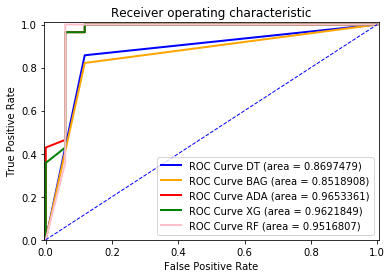

In [168]:
print("************  *******************")


%matplotlib inline

plt.figure()

plt.plot(fprdt, tprdt, color='blue', lw=2, 
         label='ROC Curve DT (area = %0.7f)' % AUCDT)

plt.plot(fprbag, tprbag, color='orange', lw=2, 
         label='ROC Curve BAG (area = %0.7f)' % AUCBagging)

plt.plot(fprada, tprada, color='red', lw=2, 
         label='ROC Curve ADA (area = %0.7f)' % AUCAdaBoost)

plt.plot(fprxg, tprxg, color='green', lw=2, 
         label='ROC Curve XG (area = %0.7f)' % AUCXG)

plt.plot(fprrf, tprrf, color='pink', lw=2, 
         label='ROC Curve RF (area = %0.7f)' % AUCRF)

plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

#### Which algorithm is the best w.r.t the AUC value?

- AdaBoost Algorithm for AUC = 0.9653361


#### Which algorithm is the best w.r.t the Accuracy value?

- AdaBoost Algorithm for accuracy = 0.95555555557

- XGBoost Algorithm for accuracy = 0.9555555557

- Random Forest Algorithm for accuracy = 0.9555555557



#### Which algorithm is the best when we want a False Positive Rate of %7?
- Random Forest